## Statistics Exercise (Statistika deskriptif, inferensia, pengujian hipotesis, dan A/B Test)

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

#### No. 1

Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)!
Ceritakan kepada tim bisnis apa makna dari nilai nilai tersebut!

Ekspektasi output : 

● ukuran pemusatan

● ukuran penyebaran

● interpretasi

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
x = data['SalePrice']
x.describe().reset_index()

,index,SalePrice
0,count,1460.000000
1,mean,180921.195890
2,std,79442.502883
3,min,34900.000000
4,25%,129975.000000
5,50%,163000.000000
6,75%,214000.000000
7,max,755000.000000


In [4]:
print('Ukuran Pemusatan')
print('- mean:',x.mean())
print('- median:',x.median())
print('- modus:',x.mode()[0])
print('- quartile 3:',x.quantile(q=0.75))
print('- percentile 92:',x.quantile(q=0.92))
print('- percentile 93:',x.quantile(q=0.93))
print('- percentile 95:',x.quantile(q=0.95))
print('- percentile 96:',x.quantile(q=0.96))

Ukuran Pemusatan
- mean: 180921.19589041095
- median: 163000.0
- modus: 140000
- quartile 3: 214000.0
- percentile 92: 295914.95999999996
- percentile 93: 311305.0000000002
- percentile 95: 326099.9999999999
- percentile 96: 344151.4799999997


Analisis dan interpretasi:
- mean(180921.2) > median(163000) > modus(140000) maka distribusi dari data adalah skew ke kanan sehingga dapat diduga bahwa data SalePrice memiliki outlier.
- secara rata-rata, properti memiliki harga jual 180921.2 dolar (namun, karena rata-rata tidak robust terhadap pencilan dan data SalePrice memiliki pencilan, dapat dilihat ukuran median nya)
- dari median atau titik tengah, didapatkan bahwa 50% properti memiliki harga jual dibawah atau diatas 163000 dolar
- kuartil 3 didapatkan 214000 yang berarti 75% dari properti memiliki harga jual dibawah 214000 dolar. Misalkan BoD jual beli properti menargetkan minimal 25% dari properti nya terjual dengan harga di atas 200000 dolar, maka dapat disimpulkan bahwa usaha properti ini sudah mencapai targetnya karena 25% dari propertinya sudah terjual dengan harga di atas 214000 dolar
- percentile 92 didapatkan 295915 yang berarti 8% dari properti memiliki harga jual diatas 295915 dolar

In [5]:
print('Ukuran Penyebaran')
print('- std deviasi:',np.sqrt(x.var()))
print('- variansi:',x.var())
print('- range:',x.max()-x.min())
print('standar deviasi dan variansi merupakan selisih data dengan rata-rata. Sedangkan range merupakan selisih antara data terbesar dan data terkecil. Namun, std devisi, variansi, dan range merupakan ukuran yang tidak robust, kurang bisa diinterpretasikan sehingga dicoba menggunakan IQR untuk mengetahui keberadaan outlier')
print('')
IQR = x.quantile(0.75)-x.quantile(0.25)
print('- Inter Quartile Range (IQR):',IQR)
print('robust terhadap outlier dan mempu mengidentifikasi dimana letak outlier berada')
print('Maximum:',x.quantile(0.75)+(1.5*IQR))
print('Minimum:',x.quantile(0.25)-(1.5*IQR))

Ukuran Penyebaran
- std deviasi: 79442.50288288663
- variansi: 6311111264.297451
- range: 720100
standar deviasi dan variansi merupakan selisih data dengan rata-rata. Sedangkan range merupakan selisih antara data terbesar dan data terkecil. Namun, std devisi, variansi, dan range merupakan ukuran yang tidak robust, kurang bisa diinterpretasikan sehingga dicoba menggunakan IQR untuk mengetahui keberadaan outlier

- Inter Quartile Range (IQR): 84025.0
robust terhadap outlier dan mempu mengidentifikasi dimana letak outlier berada
Maximum: 340037.5
Minimum: 3937.5


Analisis dan interpretasi:
- data diatas maximum atau di bawah minimum termasuk outlier
- percentile 96 (344151.5) sudah diatas data maximum (340037.5) dan data terkecil (34900) masih di atas data minimum sehingga dapat disimpulkan bahwa sekitar 4% dari data adalah outlier, atau dengan kata lain terdapat sekitar 4% properti yang memilki harga jual yang sangat tinggi dibandingkan mayoritas data yang lainnya.

#### No 2

Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!

Secara deskriptif jelaskan apakah ada perbedaan setiap tahunnya atau tidak?

Ekspektasi output: 

● ukuran pemusatan

● ukuran penyebaran

● interpretasi

##### Ukuran pemusatan

In [6]:
a = data.loc[data['YrSold'] == 2006]['SalePrice']
b = data.loc[data['YrSold'] == 2007]['SalePrice']
c = data.loc[data['YrSold'] == 2008]['SalePrice']
d = data.loc[data['YrSold'] == 2009]['SalePrice']
e = data.loc[data['YrSold'] == 2010]['SalePrice']

In [7]:
desc = data.groupby(['YrSold'])['SalePrice'].describe().reset_index()

modus = {'YrSold' : [2006,2007,2008,2009,2010],
         'modus' : [a.mode()[0],b.mode()[0],c.mode()[0],d.mode()[0],e.mode()[0]]}
modus = pd.DataFrame(modus)
desc.merge(modus, on='YrSold')

,YrSold,count,mean,std,min,25%,50%,75%,max,modus
0,2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0,140000
1,2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0,129000
2,2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0,140000
3,2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0,110000
4,2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0,128000


##### Analisis dan interpretasi:

Properti terbanyak terjual di tahun 2009 (329 properti) dan paling sedikit terjual di tahun 2010 (175 properti). Perusahaan harus menganalisis dan mengevaluasi apa yang menjadi penyebab dari menurunnya penjualan properti di tahun 2010 yang cukup signifikan (secara angka) dari tahun sebelum-sebelumnya yang mencapai lebih dari 300 properti terjual tiap tahunnya.

Secara garis besar, dari tahun 2006-2010 properti yang terjual memiliki min harga jual berkisar antara 30000 sampai 40000. Namun, di tahun 2010 min harga jual meningkat daripada tahun-tahun sebelumnya, yakni 55000 yang berarti meskipun pada tahun 2010 hanya sedikit properti yang terjual, namum memiliki harga yang cukup tinggi.

Pada tahun 2007, perusahaan jual beli properti dapat menjual properti dengan harga tertinggi dari tahun 2006-2010.

- Mean

Secara rata-rata, harga jual properti dari tahun 2006-2010 tidak jauh berbeda (secara angka), yakni di antara 170000-180000 dolar.

- Median

Secara median, harga jual properti juga tidak jauh berbeda (secara angka), yakni di antara 150000-170000 dolar. Namun yang paling tinggi adalah pada tahun 2007, yakni 167000 yang berarti 50% properti yang terjual di tahun 2007 memiliki harga jual kurang dari atau lebih dari 167000 dolar.

- Modus

Tahun 2009 merupakan tahun dengan penjualan properti terbanyak, yakni sebanyak 338 unit dengan kebanyakan properti yang terjual pada tahun ini adalah properti dengan harga jual sekitar 110000 dolar. Harga ini termasuk harga yang paling rendah dibandingkan harga properti-properti yang paling banyak terjual di tiap tahun selain 2009 meskipun tahun 2009 adalah tahun dengan penjualan properti terbanyak.

- Quartile

Pada tahun 2010, properti yang terjual paling sedikit daripada tahun-tahun sebelumnya. Namun, jika dibandingkan dari quantile 75% nya, tahun 2010 lebih tinggi daripada tahun 2009 yang menjadi tahun dengan penjualan properti terbanyak dari tahun 2006-2010. Sebanyak 25% dari properti yang terjual di tahun 2010 terjual dengan harga lebih dari 213250 dolar, sedangkan pada tahun 2009 terjual dengan harga lebih dari 212750 dolar

##### Ukuran penyebaran

In [8]:
a = data.loc[data['YrSold'] == 2006]['SalePrice']
b = data.loc[data['YrSold'] == 2007]['SalePrice']
c = data.loc[data['YrSold'] == 2008]['SalePrice']
d = data.loc[data['YrSold'] == 2009]['SalePrice']
e = data.loc[data['YrSold'] == 2010]['SalePrice']

In [9]:
spread = {'std': [a.std(),b.std(),c.std(),d.std(),e.std()],
        'var' : [a.var(),b.var(),c.var(),d.var(),e.var()],
        'range': [a.max()-a.min(),b.max()-b.min(),c.max()-c.min(),d.max()-d.min(),e.max()-e.min()],
        'IQR':[a.quantile(0.75)-a.quantile(0.25),b.quantile(0.75)-b.quantile(0.25),c.quantile(0.75)-c.quantile(0.25),d.quantile(0.75)-d.quantile(0.25),e.quantile(0.75)-e.quantile(0.25)],
        'maximum':[a.quantile(0.75)+(1.5*IQR),b.quantile(0.75)+(1.5*IQR),c.quantile(0.75)+(1.5*IQR),d.quantile(0.75)+(1.5*IQR),e.quantile(0.75)+(1.5*IQR)],
        'minimum':[a.quantile(0.25)-(1.5*IQR),b.quantile(0.25)-(1.5*IQR),c.quantile(0.25)-(1.5*IQR),d.quantile(0.25)-(1.5*IQR),e.quantile(0.25)-(1.5*IQR)]}

df = pd.DataFrame(spread)
df.head()

,std,var,range,IQR,maximum,minimum
0,79426.838855,6.308623e+09,589689,87407.5,344820.0,5337.5
1,85768.171410,7.356179e+09,715700,89600.0,345537.5,3862.5
2,69735.610685,4.863055e+09,406261,75750.0,333037.5,5212.5
3,80879.237311,6.541451e+09,548033,87500.0,338787.5,-787.5
4,80451.280085,6.472408e+09,556657,85150.0,339287.5,2062.5


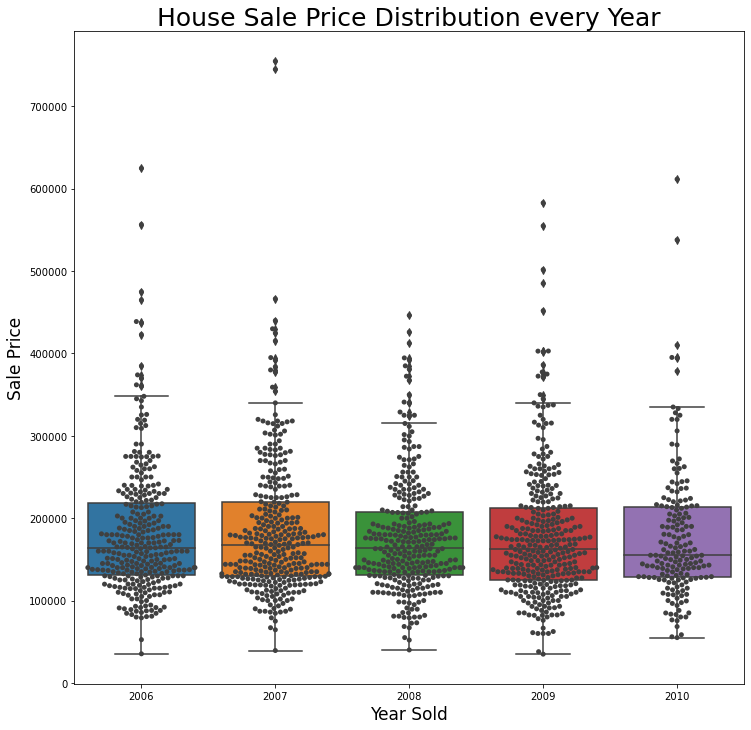

In [10]:
plt.figure(figsize = (12,12))
ax = sns.boxplot(x="YrSold", y="SalePrice", data=data)
ax = sns.swarmplot(x="YrSold", y="SalePrice", data=data, color=".25")

plt.title('House Sale Price Distribution every Year', fontsize = 25);
plt.xlabel('Year Sold', fontsize = 17)
plt.ylabel('Sale Price', fontsize = 17)
plt.show()

##### Analisis dan interpretasi:
- Secara standar deviasi atau variansi, data SalePrice yang paling menyebar di antara data tahun 2006-2010 adalah data pada tahun 2007, yang berarti harga jual properti tahun 2007 sangat bervariasi dari harga jual terendah 39300 dolar sampai harga jual tertinggi 755000 dolar (range ini juga tertinggi daripada range tahun-tahun lainnya, yakni 715700 dolar).
- Dari boxplot, dapat dilihat bahwa tiap tahun memiliki pencilan atas, yang berarti setiap tahun perusahaan properti ini juga menjual properti dengan harga yang sangat tinggi dibandingkan harga mayoritas properti. Pada tahun 2007 terjual properti dengan harga tertinggi dari tahun 2006-2010, yakni 755000 dolar, yang dapat dilihat di boxplot bahwa pada tahun 2007 memiliki pencilan yang paling tinggi daripada tahun selain 2007.

#### No 3

Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

Ceritakan analisa tersebut dengan sudut pandang statistika. Buatlah tim bisnis paham maksud dari grafik histogram tersebut.

Ekspektasi : 

● Grafik Histogram

● Analisa

● Interpretasi

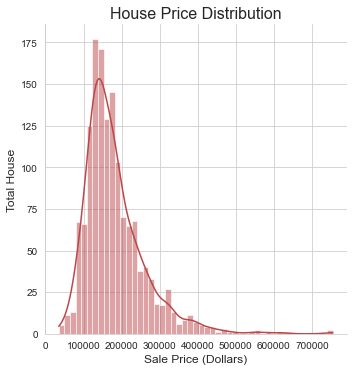

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.displot(x='SalePrice', data=data, kde=True, color='#bc4749')

# add title
plt.title('House Price Distribution', fontsize = 16);

# add label
plt.xlabel('Sale Price (Dollars)', fontsize = 12)
plt.ylabel('Total House', fontsize = 12)

plt.show()

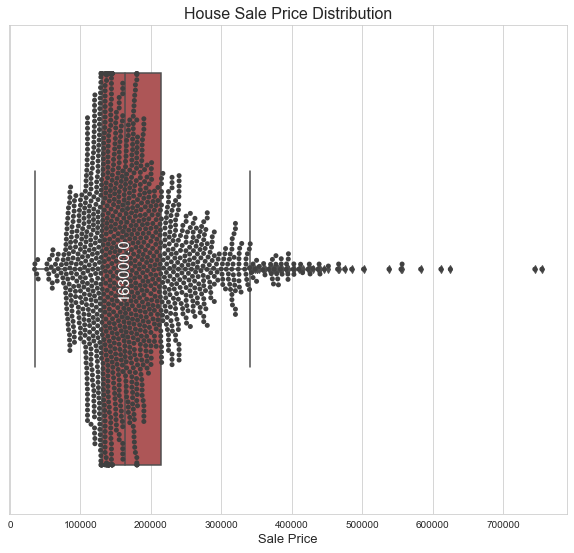

In [12]:
plt.figure(figsize = (10,9))
ax = sns.boxplot(x="SalePrice", data=data, color='#bc4749')
ax = sns.swarmplot(x="SalePrice", data=data, color=".25")

plt.title('House Sale Price Distribution', fontsize = 16);
plt.xlabel('Sale Price', fontsize = 13)
plt.text(x=data['SalePrice'].median(), y=0, s=str(data['SalePrice'].median()), color='white', fontsize=15, ha='center', va='center', rotation='vertical');
plt.show()

Analisa:
- Distribusi skew ke kanan (positively skewed): modus < median < mean
- Mayoritas data di sebelah kiri dan terdapat pencilan di sebelah kanan
- lebih baik menggunakan median karena relatif stabil terhadap adanya nilai yang sangat tinggi atau rendah (outlier) pada distribusi yang skew (menceng). Mean pada distribusi yang skewed akan tertarik pada data yang outlier sehingga tidak robust. 

Interpretasi:

Dari histogram maupun boxplot terlihat bahwa mayoritas data berada di sebelah kiri, yang berarti mayoritas properti yang dijual memiliki harga yang tidak terlalu tinggi (lebih affordable). Sedangkan untuk properti dengan harga jual yang sangat tinggi cukup jarang. Dari hasil median, dapat disimpulkan bahwa mayoritas harga jual properti adalah sekitar 163000 dolar

#### No 4

Karena ada pernyataan bahwa setiap tahunnya harga rumah itu pasti naik. (tahun terjual : YrSold, harga rumah : SalePrice)

Silahkan teman-teman buktikan dengan data yang ada menggunakan ilmu statistika? (Tidak terbatas pada pengujian apapun)

Ekspektasi :

● Penentuan hipotesis

● Pengujian yang digunakan

● Deteksi asumsi beserta cara penanganannya

● Hasil pengujian hipotesis

● Kesimpulan dan interpretasi

##### 1. Penentuan hipotesis

H0 : Rata-rata harga rumah sama untuk setiap tahun

H1 : Rata-rata harga rumah berbeda untuk beberapa tahun

##### 2. Pengujian yang digunakan

ANOVA one-way

##### 3. Deteksi asumsi beserta cara penangannya

(a) Data sampel yang digunakan berdistribusi normal

(b) Varian yang homogen (homoscedasticity)

(c) Tidak berhubungan satu dengan lain (independen)

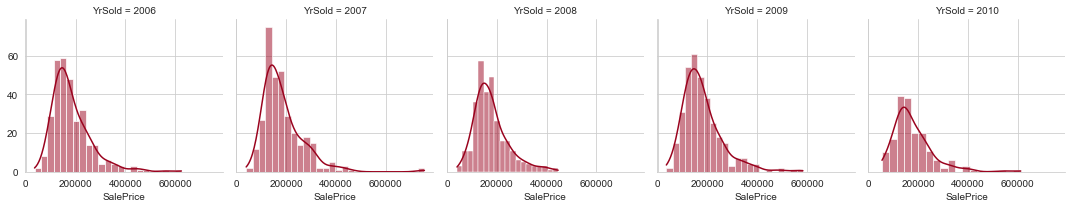

In [13]:
# Asumsi 1: Data sampel berdistribusi normal
grid = sns.FacetGrid(data, col='YrSold')
grid.map(sns.histplot, 'SalePrice',color='#9a031e',kde=True)
grid.add_legend()

plt.show()

Data tidak normal atau positively skewed, sehingga dilakukan transformasi logaritma natural.

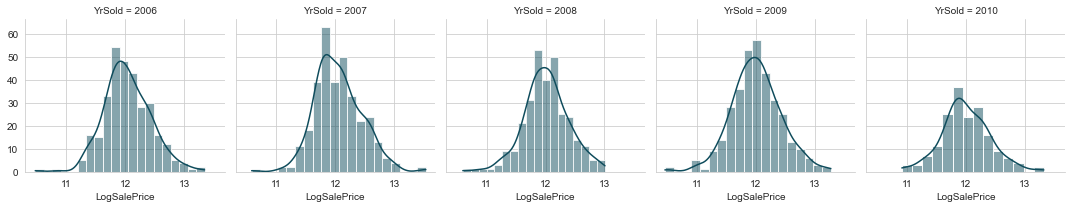

In [14]:
data['LogSalePrice'] = np.log(data['SalePrice'])

grid = sns.FacetGrid(data, col='YrSold')
grid.map(sns.histplot, 'LogSalePrice',color='#0f4c5c',kde=True)
grid.add_legend()

plt.show()

Terlihat bahwa distribusi dari data sudah normal, sehingga sudah memenuhi asumsi ANOVA yang pertama.

In [15]:
# Asumsi 2: Varian yang homogen (homoscedasticity)

Salah satu metode untuk menguji asumsi ini adalah uji homogenitas varians Levene. Ini dapat diselesaikan menggunakan metode levene() dari Scipy.stats dengan hipotesis sebagai berikut.

H0: varian homogen (homoscedasticity)

H1: varian tidak homogen (heteroscedasticity)

alpha: 0.05

In [16]:
st.levene(data['LogSalePrice'][data['YrSold'] == 2006],
             data['LogSalePrice'][data['YrSold'] == 2007],
             data['LogSalePrice'][data['YrSold'] == 2008],
             data['LogSalePrice'][data['YrSold'] == 2009],
             data['LogSalePrice'][data['YrSold'] == 2010])

LeveneResult(statistic=0.612253142460848, pvalue=0.6538565399267009)

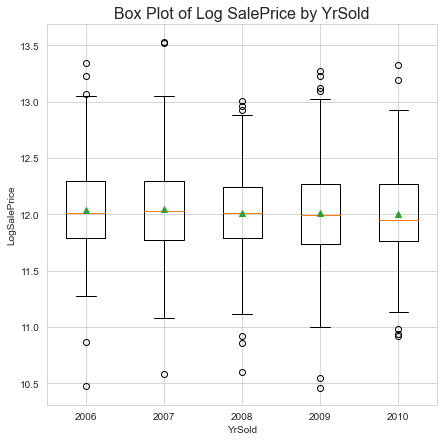

In [17]:
fig = plt.figure(figsize= (7, 7))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Log SalePrice by YrSold", fontsize= 16)
ax.set

df = [data['LogSalePrice'][data['YrSold'] == 2006],
             data['LogSalePrice'][data['YrSold'] == 2007],
             data['LogSalePrice'][data['YrSold'] == 2008],
             data['LogSalePrice'][data['YrSold'] == 2009],
             data['LogSalePrice'][data['YrSold'] == 2010]]

ax.boxplot(df,
           labels= ['2006', '2007', '2008', '2009', '2010'],
           showmeans= True)

plt.xlabel("YrSold")
plt.ylabel("LogSalePrice")

plt.show()

pvalue > alpha sehingga tidak cukup bukti untuk menolak bahwa varian homogen, yang berarti bahwa kelompok-kelompok tersebut memiliki perbedaan yang tidak signifikan secara statistik dalam variabilitasnya. Dari boxplot juga dapat dilihat bahwa panjang box pada setiap boxplot memiliki panjang yang sama, yang menunjukkan bahwa variabilitasnya dapat dikatakan homogen. Dengan demikian, asumsi kedua dari ANOVA terpenuhi.

In [18]:
# Asumsi 3: Tidak berhubungan satu dengan lain (independen)

Tidak ada tes formal yang dapat digunakan untuk memverifikasi bahwa pengamatan di setiap kelompok independen dan diperoleh dengan sampel acak. Satu-satunya cara asumsi ini dapat dipenuhi adalah jika desain acak digunakan. Jadi diasumsikan bahwa data yang diperoleh berasal dari desain acak. Dengan demikian, asumsi ketiga dari ANOVA terpenuhi.

##### 4. Hasil pengujian hipotesis

In [19]:
df_2006 = data[data['YrSold'] == 2006]
df_2007 = data[data['YrSold'] == 2007]
df_2008 = data[data['YrSold'] == 2008]
df_2009 = data[data['YrSold'] == 2009]
df_2010 = data[data['YrSold'] == 2010]

anova = st.f_oneway(df_2006['LogSalePrice'],df_2007['LogSalePrice'],df_2008['LogSalePrice'],df_2009['LogSalePrice'],df_2010['LogSalePrice'])

pvalue = anova.pvalue
print('pvalue:', pvalue)
if pvalue >= 0.05:
  print('Tidak cukup bukti menolak H0')
else:
  print('Cukup bukti menolak H0')

pvalue: 0.5656374175357914
Tidak cukup bukti menolak H0


##### 5. Kesimpulan dan Interpretasi:
pvalue > alpha sehingga tidak cukup bukti untuk menolak bahwa rata-rata harga rumah sama setiap tahunnya dengan interval konfidensi 95%. Berarti pernyataan bahwa setiap tahunnya harga rumah itu pasti naik tidak benar secara statistik.

#### No 5

Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?
Data yang digunakan berasal dari folder bank.zip file yang digunakan adalah bank-full.csv
1. Untuk variabel jumlah campaign bisa dicek untuk kolom campaign 
2. untuk variabel apakah akhirnya user membuka akun atau tidak bisa menggunakan variabel y

1. Pemahaman konsep A/B Testing (Jelaskan sub bagian berikut)
a. Apa nama experimentnya?
b. Definisikan Hipotesis
c. Siapa participant-nya?
d. Variabel yang akan diuji apa?
e. Metrics apa yang akan digunakan?
f. Berapa sample size dan durasi experiment?

2. Pengujian Hipotesis
b. Penentuan hipotesis
c. Pengujian yang digunakan
d. Deteksi asumsi beserta cara penanganannya
e. Hasil pengujian hipotesis
f. Kesimpulan dan interpretasi

In [20]:
data = pd.read_csv('bank-full.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### 1. Pemahaman konsep A/B Testing (Jelaskan sub bagian berikut)

##### a. Apa nama experimentnya?

AB Test Pengaruh Jumlah Campaign terhadap Pembukaan Akun Deposit Bank oleh User

##### b. Definisikan Hipotesis

Semakin banyak campaign akan dapat meningkatkan jumlah pembukaan akun deposit bank oleh user (rasio pembukaan akun)

##### c. Siapa participant-nya?

Seluruh user yang menjadi target campaign

##### d. Variabel yang akan diuji apa?

Jumlah campaign (campaign) dan variabel yang menunjukkan user membuka akun atau tidak (y) 

##### e. Metrics apa yang akan digunakan?

Macroconversions, yakni rasio pembukaan akun

##### f. Berapa sample size dan durasi experiment?

In [21]:
# sample size
import math

Slovin = data.shape[0]/(1+((data.shape[0])*((0.05)**2)))
print('Sample size:',math.ceil(Slovin))

Sample size: 397


In [22]:
df = data.sample(n=397, random_state=0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14001,37,management,married,tertiary,no,1403,yes,no,cellular,10,jul,91,15,-1,0,unknown,no
32046,36,services,single,secondary,no,-253,yes,no,cellular,14,apr,1073,1,-1,0,unknown,yes
13318,47,blue-collar,married,primary,no,-406,no,yes,telephone,8,jul,243,5,-1,0,unknown,no
42991,57,housemaid,married,primary,no,501,yes,yes,cellular,11,feb,105,7,188,2,failure,no
14237,33,blue-collar,married,secondary,yes,-406,yes,yes,cellular,14,jul,332,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,34,admin.,divorced,secondary,no,67,yes,no,unknown,6,may,90,1,-1,0,unknown,no
43611,45,housemaid,married,secondary,no,360,no,no,cellular,4,may,113,1,182,1,success,no
41804,45,housemaid,married,primary,no,8692,yes,no,cellular,14,oct,108,1,-1,0,unknown,no
10973,37,management,married,tertiary,no,1170,no,yes,unknown,17,jun,153,3,-1,0,unknown,no


In [23]:
# durasi experiment

hingga campaign untuk seluruh target campaign selesai

#### 2. Pengujian Hipotesis
mengetahui hubungan/korelasi antara data grouping kategorik dengan uji proporsi beberapa populasi

a. Penentuan hipotesis

    H0: Variabel pengelompokan tidak memiliki hubungan atau korelasi di antara mereka

    H1: Variabel terkait atau memiliki korelasi satu sama lain

b. Pengujian yang digunakan

    Uji Chi-kuadrat
    Uji Chi-kuadrat adalah uji statistik non-parametrik yang memungkinkan kita untuk memahami hubungan antara variabel kategoris dari kumpulan data. Artinya, itu mendefinisikan korelasi antara pengelompokan data kategorikal.

c. Deteksi asumsi beserta cara penanganannya

1. Tidak ada cell dengan nilai frekuensi kenyataan atau disebut juga actual count (F0) sebesar 0 (Nol).
2. Apabila bentuk tabel kontingensi 2 X 2, maka tidak boleh ada 1 cell saja yang memiliki frekuensi harapan atau disebut juga expected count (Fh) kurang dari 5.
3. Apabila bentuk tabel lebih dari 2 x 2, misak 2 x 3, maka jumlah cell dengan frekuensi harapan yang kurang dari 5 tidak boleh lebih dari 20%.

Sumber: https://www.statistikian.com/2012/11/rumus-chi-square.html

#### Perhitungan total user yang membuka dan tidak membuka akun tiap jumlah campaign

In [24]:
df1 = df.groupby(['campaign','y']).agg({'y':['count']}).reset_index()
df1.columns = ['TotalCampaign','Akun','TotalUser']
df1

,TotalCampaign,Akun,TotalUser
0,1,no,123
1,1,yes,24
2,2,no,94
3,2,yes,11
4,3,no,46
5,3,yes,6
6,4,no,29
7,4,yes,2
8,5,no,13
9,5,yes,5


In [25]:
# Tabel kontingensi
df2 = {'TotalCampaign': [1,2,3,4,5,6,7,8,9,10,11,12,13,15,16],
      'Yes': [24,11,6,2,5,0,0,0,0,0,0,0,0,0,0],
      'No': [123,94,46,29,13,12,7,9,2,5,4,2,1,1,1]}
df2 = pd.DataFrame(df2)
df2['Total'] = df2['Yes'] + df2['No']
df2

,TotalCampaign,Yes,No,Total
0,1,24,123,147
1,2,11,94,105
2,3,6,46,52
3,4,2,29,31
4,5,5,13,18
5,6,0,12,12
6,7,0,7,7
7,8,0,9,9
8,9,0,2,2
9,10,0,5,5


In [26]:
# Perhitungan actual count (F0): tiap sel merupakan F0
df2['F0_Yes'] = df2['Yes']
df2['F0_No'] = df2['No']
df2

,TotalCampaign,Yes,No,Total,F0_Yes,F0_No
0,1,24,123,147,24,123
1,2,11,94,105,11,94
2,3,6,46,52,6,46
3,4,2,29,31,2,29
4,5,5,13,18,5,13
5,6,0,12,12,0,12
6,7,0,7,7,0,7
7,8,0,9,9,0,9
8,9,0,2,2,0,2
9,10,0,5,5,0,5


Mulai dari TotalCampaign=6 hingga TotalCampaign=16 memiliki nilai F0=0 (menyalahi asumsi 1)

In [27]:
# Perhitungan expected count (Fh)
# Rumus: (jumlah baris/jumlah semua)*jumlah kolom

df2['Fh_Yes'] = (df2['Total']/(df2['Total'].sum()))*(df2['Yes'].sum())
df2['Fh_No'] = (df2['Total']/(df2['Total'].sum()))*(df2['No'].sum())
df2

,TotalCampaign,Yes,No,Total,F0_Yes,F0_No,Fh_Yes,Fh_No
0,1,24,123,147,24,123,17.773300,129.226700
1,2,11,94,105,11,94,12.695214,92.304786
2,3,6,46,52,6,46,6.287154,45.712846
3,4,2,29,31,2,29,3.748111,27.251889
4,5,5,13,18,5,13,2.176322,15.823678
5,6,0,12,12,0,12,1.450882,10.549118
6,7,0,7,7,0,7,0.846348,6.153652
7,8,0,9,9,0,9,1.088161,7.911839
8,9,0,2,2,0,2,0.241814,1.758186
9,10,0,5,5,0,5,0.604534,4.395466


In [28]:
# Menghitung jumlah Fh<5
sum = 0
for index,kolom in df2.iterrows():
    if (kolom['Fh_Yes'] < 5):
        sum+=1
    else:
        sum+=0

    if (kolom['Fh_No'] < 5):
        sum+=1
    else:
        sum+=0
print('Total:',sum)
print('Persentase:',round(sum/(2*(df2['TotalCampaign'].count()))*100,2))

Total: 19
Persentase: 63.33


In [29]:
# Menghitung jumlah Fh<5 saat TotalCampaign>=6
sum = 0
for index,kolom in df2[df2['TotalCampaign'] >= 6].iterrows():
    if (kolom['Fh_Yes'] < 5):
        sum+=1
    else:
        sum+=0

    if (kolom['Fh_No'] < 5):
        sum+=1
    else:
        sum+=0
print('Total:',sum)
print('Persentase:',round(sum/(2*(df2['TotalCampaign'].count()))*100,2))

Total: 17
Persentase: 56.67


Mulai dari TotalCampaign=6 hingga TotalCampaign=16 memiliki nilai Fh<5 sebesar 56.67% dan bahkan untuk keseluruhan terdapat 63.33% (menyalahi asumsi 3).

Maka dari itu, untuk mengatasinya, akan digunakan data dengan TotalCampaign<6 sehingga memenuhi semua asumsi Uji Chi-kuadrat yang telah disebutkan sebelumnya.

d. Hasil pengujian hipotesis

In [30]:
info = [[147,105,52,31,18],[24,11,6,2,5]]

In [31]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected= chi2_contingency(info)
 
alpha = 0.05
print("p value: " + str(p)) 

if p >= alpha:
  print('Tidak cukup bukti menolak H0')
else:
  print('Cukup bukti menolak H0')

p value: 0.32002278961321534
Tidak cukup bukti menolak H0


e. Kesimpulan dan interpretasi

##### Kesimpulan:

pvalue > alpha sehingga tidak cukup bukti untuk menolak bahwa variabel pengelompokan tidak memiliki hubungan atau korelasi di antara mereka dengan interval konfidensi 95%.

##### Interpretasi:

Dengan demikian, secara statistik total campaign tidak memengaruhi keinginan user untuk membuka akun deposit atau tidak